In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [32]:
raw_df = pd.read_csv("Csocsó-mentális-leltár-válaszok.csv", sep=";", index_col=1)

In [ ]:
if raw_df.shape[1] != 32:
    raise Exception("Number of columns isn't 32, please check input file")

In [72]:
wants_feedback = raw_df[pd.notnull(raw_df.index)]
jeligek = list(wants_feedback.index)
jeligek = [re.sub(r" ", r"_", jelige) for jelige in jeligek]
print(jeligek)

['Nip', 'Nagyderka', 'Jackal', 'Csocsóka', 'Csocsi', 'Domingó', 'ksnbszm', 'tralala', 'Ninja', 'Földi_Nóra_', 'DP', 'Leghosszabb_interjúd_női_fele:)', 'selfcheck']


In [ ]:
wants_feedback_answers = wants_feedback.iloc[:,[1,2,3,4,5,6,7,8,9,12,13,14,15,16,19,20,21,22,23,24]]

In [ ]:
if wants_feedback_answers.shape[1] != 20:
    raise Exception("NUmber of columns isn't 20, something went wrong")

In [ ]:
wants_feedback_answers.to_csv("wants_feedback_answers.csv", sep=";", header=False, index=False)

In [ ]:
with open("wants_feedback_answers.csv", encoding="utf-8") as f:
    feedback = ""
    for line in f:
        feedback_line = ""
        
        line_split = re.split(r";", line.strip("\n"))
        for answer in line_split:
            if re.match(r"\d", answer):
                answer = re.sub(r"(\d)\..+", r"\1", answer)
            else:
                answer = re.sub(r".+", r"np.nan", answer)
            feedback_line += answer + ";"
        
        feedback += feedback_line[:-1] + "\n"

In [30]:
with open("feedback_data.csv", "w", encoding="utf-8") as f:
    f.write(feedback)

In [33]:
feedback_data = np.genfromtxt("feedback_data.csv", delimiter=";")

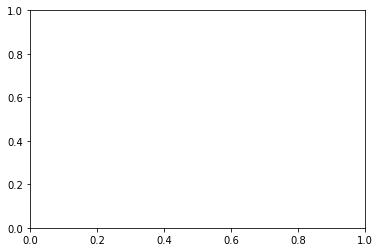

In [71]:
x = ["bla1", "bla2", "bla3", "bla4", "bla5", "bla6"]
y = np.empty(6)
faktorok = [[0,1,16], [2,3,4,8,9,10,11,12], [3,5,6,7,10], [14,15], [1,12,13,15,17], [17,18,19]]

fig, ax = plt.subplots()
for ember in range(len(jeligek)):
    for faktor in range(6):
        y[faktor] = np.nanmean(feedback_data[ember,faktorok[faktor]])
    
    rects = ax.bar(x, y, width = 0.5, color='lightgreen')
    ax.set(title=jeligek[ember], ylabel="válasz átlagok")
    ax.set_ylim(0, 6)
    autolabel(rects)
    plt.savefig("diagramok\\" + jeligek[ember] + ".jpg")
    plt.cla()

In [65]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, round(height, 1) , ha='center', va='bottom')